In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa.display
from scipy.io.wavfile import read
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
from scipy.signal import get_window
import scipy
import wave as wr
from pydub import AudioSegment
from scipy.signal import hann

In [3]:
"""
    Description: Function for applying Hann Windowing to a signal to ensure no artifacts
    @param [Array] y: The audio signal
    @param [Integer] sr: The sample rate of the signal
    Return: [Array] The windowed signal
"""
def apply_windowing(y, sr):
    N = len(y)
    w = hann(N)
    yw = y*w
    return yw



In [4]:
"""
    Description: Function for normalizing a signal by amplitude
    @param [Array] y: The audio signal
    @param [Integer] sr: The sample rate of the signal
    Return: [Array] The normalized signal
"""

def normalize(y):
    maximum = max(y) #Must be changed to different value
    y = y/maximum
    return y


In [76]:
"""
    Description: Showing information about the signals in the dataset
"""

BASE_DIR = "C:/Users/Marianne Pettersen/PycharmProjects/SoundAnalysisProject/ventleak/work_low/1/1_iO_5.0n_1l_.wav"
y, sr = librosa.load(BASE_DIR, sr=None)
audio_segment = AudioSegment.from_file(BASE_DIR)
frames = int(sr*dur) #frames=samples
dur = np.round(frames/sr, 3) #duration in seconds
maximum = np.round(max(y), 3)
print("Sample rate:", sr, "\nSamples/Frames:", samples, "\nDuration:", dur, "sec\nMax amplitude:", maximum)


Sample rate: 48000 
Samples/Frames: 1396021 
Duration: 29.084 sec
Max amplitude: 0.1451478
1396021.0
1396021


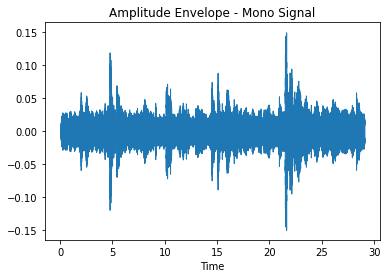

In [14]:
"""
    Description: Creating a plot of the signals amplitude over time
"""
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(title='Amplitude Envelope - Mono Signal')
librosa.display.waveshow(y=y, sr=sr, ax=ax)

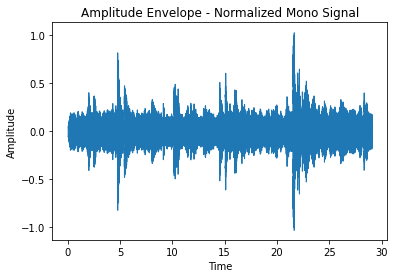

In [24]:
"""
    Description: Creating a plot of the signals amplitude over time after being normalized
"""
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(title='Amplitude Envelope - Normalized Mono Signal', ylabel='Amplitude')
librosa.display.waveshow(y=normalize(y), sr=sr, ax=ax)

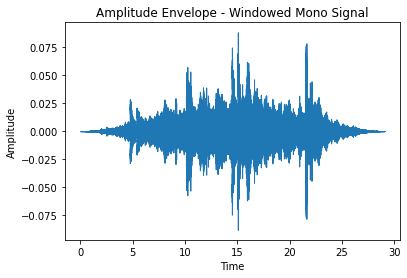

In [26]:
"""
    Description: Creating a plot of the signals amplitude over time after being windowed
"""
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(title='Amplitude Envelope - Windowed Mono Signal', ylabel='Amplitude')
librosa.display.waveshow(y=apply_windowing(y, sr), sr=sr, ax=ax)

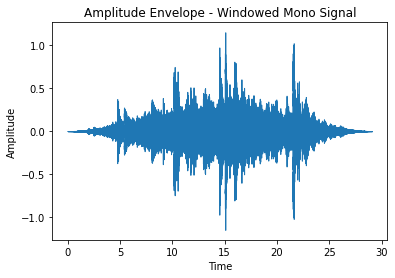

In [28]:
"""
    Description: Creating a plot of the signals amplitude over time after being windowed and normalized
"""
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(title='Amplitude Envelope - Windowed Mono Signal', ylabel='Amplitude')
librosa.display.waveshow(y=normalize(apply_windowing(y, sr)), sr=sr, ax=ax)

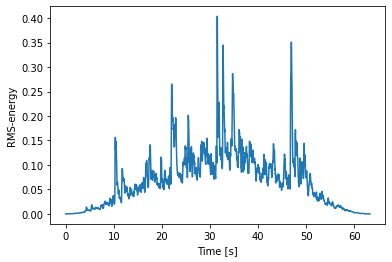

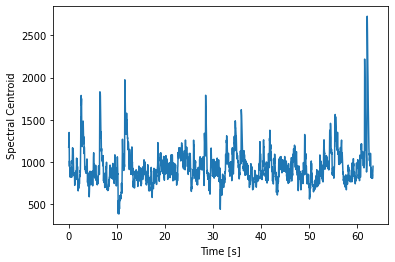

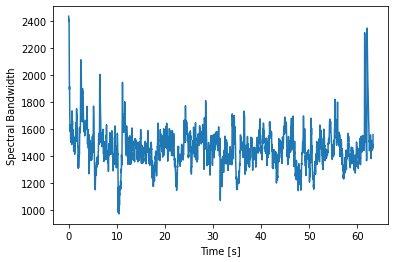

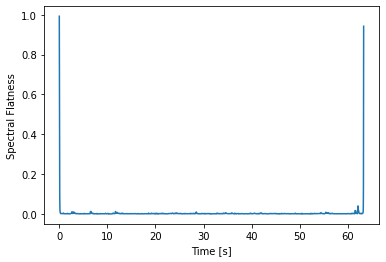

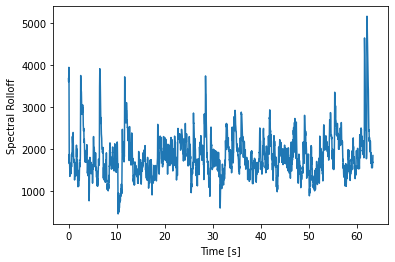

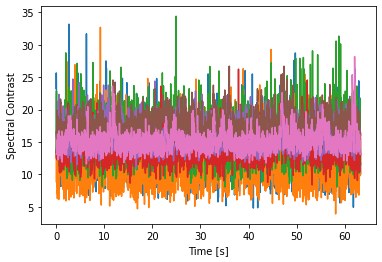

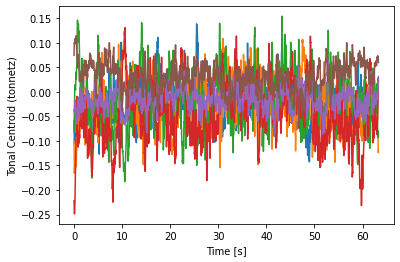

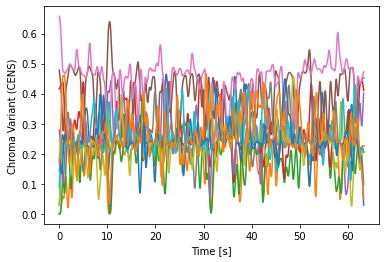

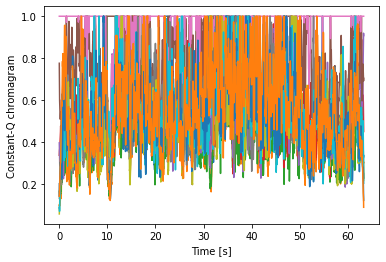

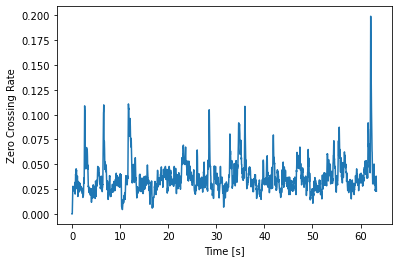

In [46]:
"""
    Description: Function for plotting a feature of a signal
    @param [Array] data: The feature data points
    Return: None, but shows a plot
"""

def plot_feature(data, ylabel):
    times = librosa.times_like(data)
    plt.plot(times, data.T)
    plt.xlabel("Time [s]")
    plt.ylabel(ylabel)
    plt.show()
    
"""
    Description: Getting some basic audio features from the signal
"""

rms = librosa.feature.rms(y=y_norm_win)
s_cent = librosa.feature.spectral_centroid(y=y_norm_win, window='hann')
s_band = librosa.feature.spectral_bandwidth(y=y_norm_win, window='hann')
s_flat = librosa.feature.spectral_flatness(y=y_norm_win, window='hann')
s_roll = librosa.feature.spectral_rolloff(y=y_norm_win, window='hann')
s_cont = librosa.feature.spectral_contrast(y=y_norm_win, window='hann')
tonn = librosa.feature.tonnetz(y=y_norm_win)
chroma_cens = librosa.feature.chroma_cens(y=y_norm_win)
chroma_cqt = librosa.feature.chroma_cqt(y=y_norm_win)
zcr = librosa.feature.zero_crossing_rate(y=y_norm_win)
mfcc = librosa.feature.mfcc(y=y_norm_win, window='hann')

plot_feature(rms, "RMS-energy") # Time-domain
plot_feature(s_cent, "Spectral Centroid") #Frequency-domain
plot_feature(s_band, "Spectral Bandwidth") #Frequency-domain
plot_feature(s_flat, "Spectral Flatness") #Frequency-domain
plot_feature(s_roll, "Spectral Rolloff") #Frequency-domain
plot_feature(s_cont, "Spectral Contrast") #Frequency-domain
plot_feature(tonn, "Tonal Centroid (tonnetz)") #Frequency-domain
plot_feature(chroma_cens, "Chroma Variant (CENS)") #Frequency-domain
plot_feature(chroma_cqt, "Constant-Q chromagram") #Frequency-domain
plot_feature(zcr, "Zero Crossing Rate") # Time-domain

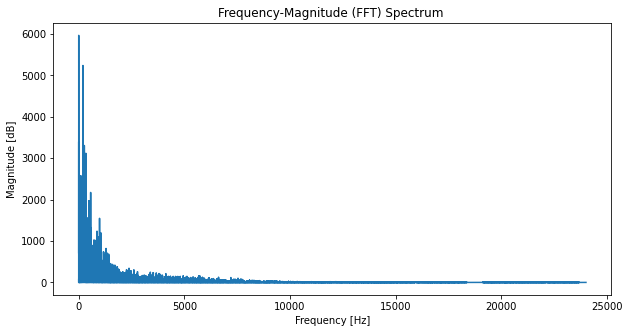

In [51]:
"""
    Description: Example function for applying Fast-Fourier Transform on a signal
    @param [Array] y: The audio signal
    @param [Integer] sr: The sample rate of the signal
    @param [Boolean] plot: 'True' or 'False' for wanting to show the fft-plot
    @param [Boolean] norm: 'True' or 'False' for wanting to normalize the signal
    Return: [Array, Array] The frequencies and belonging magnitudes from the signal
""" 

def apply_fft(y, sr, plot, norm):
    if norm == True:
        yf = np.fft.fft(y, norm='ortho')
        norm = " - Normalized"
    else: 
        yf = np.fft.fft(y, norm=None)
        norm = " "
    magnitude = np.abs(yf.real)
    frequency = np.linspace(0, sr, len(yf))
    if plot == True:
        plt.figure(figsize=(10,5))
        plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)])
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Magnitude [dB]")
        plt.title("Frequency-Magnitude (FFT) Spectrum" + norm)
        plt.show()
    return [frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)]]

[freq, mag] = apply_fft(y_norm_win, sr, plot=True, norm=False)



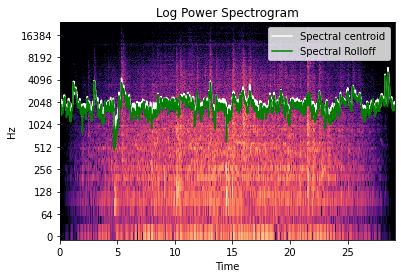

In [69]:
"""
    Description: Plotting a spectrogram of a signal with the centroid and rolloff feature
    @param [Array] S: Spectrogram Magnitude (of a signal)
"""
S, phase = librosa.magphase(librosa.stft(y=y_norm_win))
cent = librosa.feature.spectral_centroid(S=S, sr=sr)
rolloff = librosa.feature.spectral_rolloff(S=S)
times = librosa.times_like(cent, sr=sr)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.plot(times, rolloff.T, label='Spectral Rolloff', color='g')
ax.legend(loc='upper right')
ax.set(title='Log Power Spectrogram')       
plt.show()